# Before you start this assignment, read and follow through `GoogleColabTutorial.ipynb`

# Examples \& Exercises
The below toy example reads and visulize the bathymetry map of the Western Atlantic Ocean and CTD profiles along the [GO-SHP A20 section](https://usgoship.ucsd.edu/hydromap/), you may try the toy example by running the following scripts. Assignments will be the  <font color="orange">Exercises</font>. You can utilize the code from the examples or create your own. 
<!-- Undergrad students are *not* required to complete the "Exercise for grad students". -->

## 1. Import a bunch of libraries

In [1]:
# %%capture

# # Install necessary packages and restart the kernel.
# !pip install netcdf4
# !pip install xarray
# !pip install ipympl
# # resetart kernel
# import IPython
# IPython.Application.instance().kernel.do_shutdown(True) #automatically restarts kernel

In [2]:
# # to enable the jupyter widgets so that you can plot interactive figures
# from google.colab import output
# output.enable_custom_widget_manager()

In [3]:
# import python libraries
import xarray as xr
import numpy as np
import gsw
from matplotlib import cm
import matplotlib.pyplot as plt

## 2. Load \& plot the ocean bathymetry and see how the ocean bottom looks like!

In [4]:
# load ocean topography data (ETOPO2022 - bedrock - 60 arc second: https://www.ncei.noaa.gov/products/etopo-global-relief-model) 
opendap_url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/60s/60s_bed_elev_netcdf/ETOPO_2022_v1_60s_N90W180_bed.nc?lat[0:10:10799],lon[0:10:21599],z[0:10:10799][0:10:21599]'
ds = xr.open_dataset(opendap_url, engine='netcdf4')
ds

<xarray.Dataset> Size: 9MB
Dimensions:  (lat: 1080, lon: 2160)
Coordinates:
  * lat      (lat) float64 9kB -89.99 -89.83 -89.66 -89.49 ... 89.51 89.68 89.84
  * lon      (lon) float64 17kB -180.0 -179.8 -179.7 ... 179.5 179.7 179.8
Data variables:
    z        (lat, lon) float32 9MB ...
Attributes:
    GDAL_AREA_OR_POINT:             Area
    node_offset:                    1
    GDAL_TIFFTAG_COPYRIGHT:         DOC/NOAA/NESDIS/NCEI > National Centers f...
    GDAL_TIFFTAG_DATETIME:          20220929123913.0
    GDAL_TIFFTAG_IMAGEDESCRIPTION:  Topography-Bathymetry; EGM2008 height
    Conventions:                    CF-1.5
    GDAL:                           GDAL 3.3.2, released 2021/09/01
    NCO:                            netCDF Operators version 4.9.1 (Homepage ...
    DODS.strlen:                    0
    crs.DODS.strlen:                0

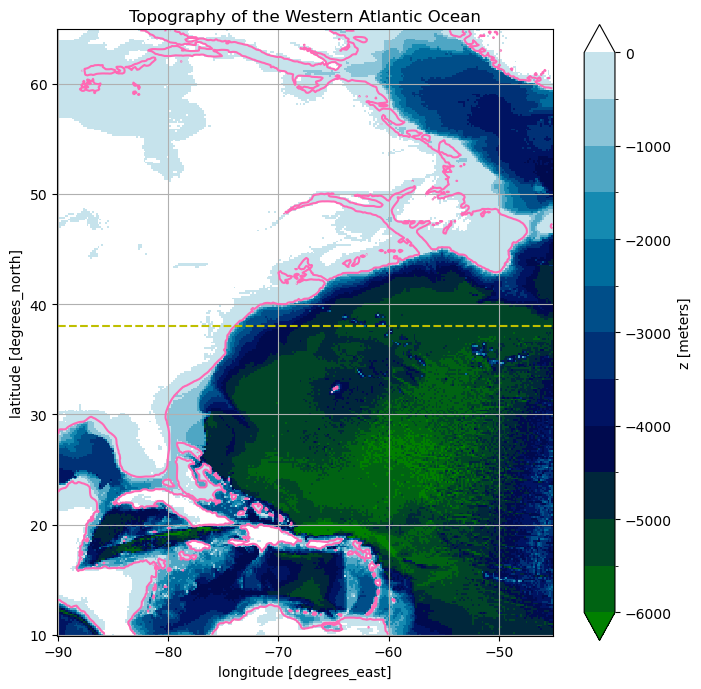

In [5]:
# define lat and lon boundaries of region of interest - Western Atlantic
lat = [10, 65]
lon = [-90, -45]
mask_lat = np.where((ds.lat > lat[0]) & (ds.lat <= lat[1]))[0]
mask_lon = np.where((ds.lon > lon[0]) & (ds.lon <= lon[1]))[0]

# to display section of 38N latitude
lat_demo = 38

# map the topography
# ("plotting", see more: https://xarray.pydata.org/en/stable/user-guide/plotting.html)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
ds.z[mask_lat, mask_lon].plot.pcolormesh(ax=ax, vmax=0, vmin=-6000, levels=13, 
                                        cmap=cm.ocean, x='lon', y='lat', add_colorbar=True)
ds.z[mask_lat, mask_lon].plot.contour(ax=ax, levels=[-200], colors = 'hotpink', linestyles = '-')
ax.plot(lon, np.ones(np.shape(lon))*lat_demo, 'y--')
ax.set_title('Topography of the Western Atlantic Ocean')
ax.grid(True)
ax.set_aspect('equal', adjustable='box')

<div class="alert alert-block alert-warning">
<b>Exercise 1:</b> 1. Plot topography of the eastern Pacific and 200 m isobath of the western coast of the US  (1 pt), 2. Estimate the width of the continental shelf off California (1 pt). 
</div>

<xarray.DataArray 'z' (lon: 2160)> Size: 9kB
[2160 values with dtype=float32]
Coordinates:
    lat      float64 8B 38.01
  * lon      (lon) float64 17kB -180.0 -179.8 -179.7 ... 179.5 179.7 179.8
Attributes:
    long_name:      z
    grid_mapping:   crs
    units:          meters
    positive:       up
    standard_name:  height
    vert_crs_name:  EGM2008
    vert_crs_epsg:  EPSG:3855
    _ChunkSizes:    [1350 2700]

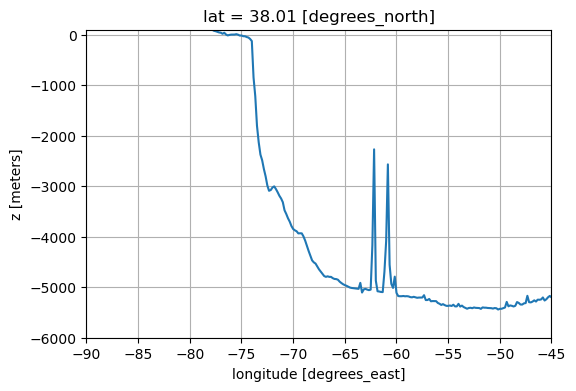

In [6]:
# bathymetry along 38N latitude in the western atlantic
# ("indexing", see more: https://xarray.pydata.org/en/stable/user-guide/indexing.html)

Topo_ = ds.z.sel(lat=lat_demo, method='nearest')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

Topo_.plot(ax=ax)
ax.set_xlim(lon)
ax.set_ylim([-6000, 100])
ax.grid(True)
Topo_

<div class="alert alert-block alert-warning">
<b>Exercise 2:</b> Determine the longitude of the shelf break and estimate the width of both the continental shelf and the continental slope at 38°N across the east coast of North America. Tip: it might be easier if you zoom in the plot by tuning `ax.set_xlim()` and `ax.set_ylim()`  (1 pt)
</div>

## 3. Erosion vs deposition

<div class="alert alert-block alert-warning">
<b>Exercise 3:</b> Submit three photos you’ve taken of the coastal ocean and explain the features you recognized that were covered in Lecture 01. Tip: You may discuss aspects of the coastal zone (see example below), whether the landform is primarily depositional or erosional, and any human-made coastal infrastructure. (2 pts)
</div>

<img src="../figures/lecture01/waterfront_beach.jpg" width="600">


# Your answers to the exercises:
Please complete your exercises below:

## Exercise 1
<div class="alert alert-block alert-warning">
<b>Exercise 1:</b> 1. Plot topography of the eastern Pacific and 200 m isobath of the western coast of the US  (1 pt), 2. Estimate the width of the continental shelf off California (1 pt). 
</div>

## Exercise 2
<div class="alert alert-block alert-warning">
<b>Exercise 2:</b> Determine the longitude of the shelf break and estimate the width of both the continental shelf and the continental slope at 38°N across the east coast of North America. Tip: it might be easier if you zoom in the plot by tuning `ax.set_xlim()` and `ax.set_ylim()`  (1 pt)
</div>

## Exercise 3
<div class="alert alert-block alert-warning">
<b>Exercise 3:</b> Submit three photos you’ve taken of the coastal ocean and explain the features you recognized that were covered in Lecture 01. Tip: You may discuss aspects of the coastal zone (see example below), whether the landform is primarily depositional or erosional, and any human-made coastal infrastructure. (2 pts)
</div>

## Additional Exercises:
Students can earn 1 bonus points by completing the Additional Exercises.

<div class="alert alert-block alert-warning">
<b>Additional Exercise: </b> Plot the bathymetry along a latitudinal transect across the west coast of the North American continent. Identify the longitude of the shelf break, and estimate the widths of the continental shelf and continental slope. Note any submarine canyons encountered along the section. (1 pt)
</div>